In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
data = pd.read_csv('combined_data.csv', header = None)
data = pd.DataFrame(data)
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna() 
artist = data[4800]
data = data.drop(columns=4800)
data = np.asarray(data)
data.shape

c:\users\son do\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(8330, 4800)

(1600,)
[107.9453 121.7375 133.8951 ... 119.1271 122.7353 141.0476]


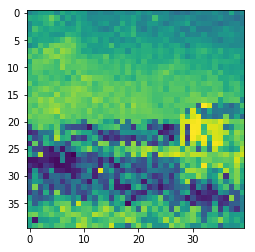

In [4]:
pic = data[329]
print(pic.shape)
print(pic)
pic = pic.reshape((1,4800))
pic = pic.astype(int)
pic = pic.reshape((40,40,3))
plt.imshow(pic)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
data_train, data_test, artist_train, artist_test = train_test_split(data, artist, test_size=.2)

In [6]:
X = data_train.transpose()
mean =  X.mean(axis = 1)
mean = mean.reshape(4800,1)
X_cent = X - mean
X_cov = np.cov(X_cent)
eigVal, eigVec = np.linalg.eig(X_cov)

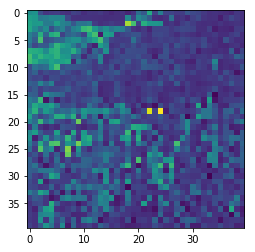

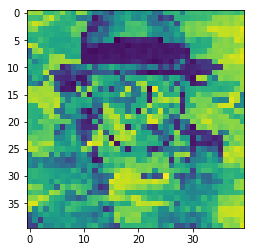

In [8]:
pic = X[:,4].transpose()
pic2 = data[1000]
pic = pic.reshape(40, 40)
pic2 = pic2.reshape(40,40)
#pic = pic.transpose(1,2,0)
pic = pic.astype(int)
pic2 = pic2.astype(int)
plt.imshow(pic)
plt.show()
plt.imshow(pic2)
plt.show()

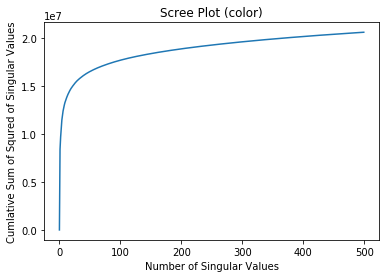

In [8]:
sum = []
for i in range(500):
    sum.append(eigVal[0:i].sum())

import matplotlib.pyplot as plt
plt.ylabel("Cumlative Sum of Squred of Singular Values")
plt.xlabel("Number of Singular Values")
plt.title("Scree Plot (color)")
plt.plot(range(0,500), sum)

[0.01612321 0.0170053  0.01678834 ... 0.01539537 0.01634282 0.0156795 ]
[ 0.01337847  0.01619012  0.01676902 ... -0.0116159  -0.01004794
 -0.00924125]
[0.02298987 0.02281677 0.02199214 ... 0.02693555 0.02869487 0.02813771]
[-0.01922714 -0.00504397  0.01467479 ... -0.01422232 -0.00041948
  0.0144783 ]
[ 0.01176813  0.01192991  0.01092953 ... -0.00903454 -0.00734006
 -0.0037059 ]
[ 0.00092437  0.00271196  0.0022714  ...  0.00097562  0.00079715
 -0.00302647]
[-0.0305286  -0.02931059 -0.02724397 ... -0.02083745 -0.02038419
 -0.02112805]
[-0.01450309 -0.01637619 -0.0150263  ...  0.02348276  0.02054139
  0.0163052 ]
[-0.01600768 -0.0185995  -0.01819003 ... -0.00705322 -0.00555
 -0.00376298]
[-0.00628349  0.00033456  0.00270932 ... -0.01356202 -0.01514774
 -0.01877253]
[ 0.01571685  0.01597052  0.01457888 ... -0.01156106 -0.0109449
 -0.00887045]
[ 0.01699691  0.00311588 -0.00801783 ... -0.00856646 -0.00568259
  0.00709772]
[-0.0095435   0.01093375  0.02284216 ...  0.00990229  0.00799265
 -0.0

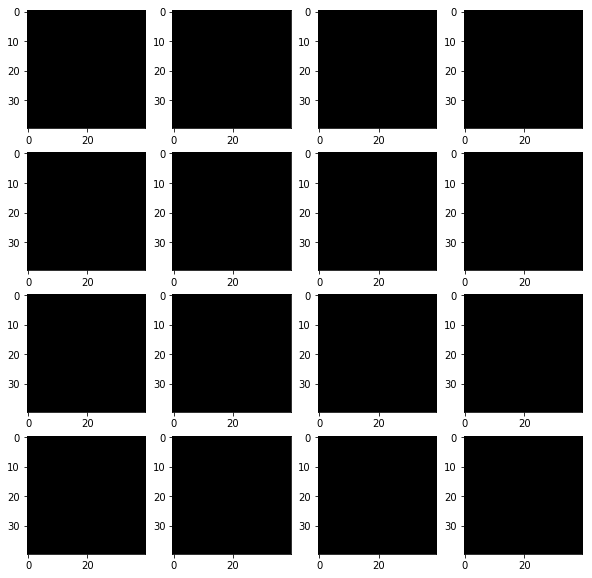

In [13]:
fig=plt.figure(figsize=(10, 10))
for i in range(16):
    pic_mat = eigVec[:,i]
    
    pic_mat = pic_mat.astype(int)
    pic_mat = pic_mat.reshape(40,40,3)
    fig.add_subplot(4, 4, i+1)
    plt.imshow(pic_mat)
plt.show()

In [12]:
fig = plt.figure()

pc_1 = []
pc_2 = []
pic = []

for i in range(1000):
    val1 = np.dot(X_cent[:,i],eigVec[:,0])
    val2 = np.dot(X_cent[:,i],eigVec[:,1])
    pc_1.append(val1)
    pc_2.append(val2)
    picture = X[:,i].transpose()
    pic.append(picture.reshape(40,40))
    
min_x = np.min(pc_1)
min_y = np.min(pc_2)

pc_1 = pc_1 + np.abs(min_x)
max_x = np.max(pc_1)
pc_2 = pc_2 + np.abs(min_y)
max_y = np.max(pc_2)

pc_1 = pc_1/max_x
pc_2 = pc_2/max_y

nx = int(fig.get_figwidth() * fig.dpi)
ny = int(fig.get_figheight() * fig.dpi)

for i in range(100):
    fig.figimage(pic[i], xo = pc_1[i]*nx, yo = pc_2[i]*ny)
    
plt.savefig("PC1vPC2_gray.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [14]:
fig = plt.figure()
pc_3 = []
pc_4 = []
pic = []


for i in range(100,1100):
    val1 = np.dot(X_cent[:,i],eigVec[:,2])
    val2 = np.dot(X_cent[:,i],eigVec[:,3])
    pc_3.append(val1)
    pc_4.append(val2)
    picture = X[:,i].transpose()
    pic.append(picture.reshape(40,40))
    
min_x = np.min(pc_3)
min_y = np.min(pc_4)

pc_3 = pc_3 + np.abs(min_x)
max_x = np.max(pc_3)
pc_4 = pc_4 + np.abs(min_y)
max_y = np.max(pc_4)

pc_3 = pc_3/max_x
pc_4 = pc_4/max_y

nx = int(fig.get_figwidth() * fig.dpi)
ny = int(fig.get_figheight() * fig.dpi)

for i in range(1000):
    fig.figimage(pic[i], xo = pc_3[i]*nx, yo = pc_4[i]*ny)

    
plt.savefig("PC3vPC4_gray.png")
plt.show()

<Figure size 432x288 with 0 Axes>